# **1. GBM**


## **1-a. `creditcard.csv`를 다운받은 후 실습을 진행해 주세요.**
- 데이터 출처: [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [ ]:
## Colab - 구글 드라이브 마운트
# Colab을 사용하시는 분들만 실행시켜 주시면 됩니다.

from google.colab import drive
drive.mount('/content/drive')

In [5]:
import pandas as pd
df = pd.read_csv("C:/Users/Flex/Documents/Euron/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **1-b. GradientBoostingClassifier을 이용하여 훈련 데이터를 fit한 후, GBM 정확도와 수행시간을 구하세요.**
(test_size = 0.2, random_state = 42)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')

In [7]:
## 데이터 분할: 훈련 데이터와 테스트 데이터

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## GBM 모델링
# 아래에 코드를 작성해 주세요.
gb_clf = GradientBoostingClassifier(random_state = 42)
gb_clf.fit(X_train, y_train)
gb_pred= gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9989


## **1-b(2). GBM으로 학습하는 시간이 얼마나 걸리는지 수행 시간을 출력해 주세요.**

In [9]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state = 42)
gb_clf.fit(X_train, y_train)
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 수행 시간: 886.7 초


## **1-c. ```subsample``` 파라미터를 설정하여 gbm 모델을 학습시키고 학습 시간을 비교해 보세요.**  
(subsample = 0.8)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.model_selection import GridSearchCV
gbm_clf = GradientBoostingClassifier(subsample=0.8)
gbm_clf.fit(X_train, y_train)
gbm_pred = gbm_clf.predict(X_test)
gbm_accuracy = accuracy_score(y_test, gbm_pred)
gbm_start_time = time.time()

print('GBM (subsample = 0.8) 정확도: {0:.4f}'.format(gbm_accuracy))
print('GBM (subsample = 0.8) 수행 시간: {0:.1f}'.format(gbm_start_time))

GBM (subsample = 0.8) 정확도: 0.9985
GBM (subsample = 0.8) 정확도: 1695905827.3


# **2. XGBoost**

- 모델 : Python Wrapper XGBoost
- 적용 데이터 : 위스콘신 유방암 데이터

In [13]:
import xgboost

print(xgboost.__version__)

1.7.3


- 출력 : 1.7.3

In [14]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

##**2-a. cancer_df의 shape을 프린트하고, 상위 5개 행을 확인해 주세요.**

In [15]:
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label

In [16]:
print(cancer_df.shape)
cancer_df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## **2-b. 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터로 추출하고, 각각의 shape을 print해주세요.**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [22]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

##**2-c. 주어진 정보를 바탕으로 하이퍼 파라미터 목록을 완성해 주세요.**
- 트리의 최대 깊이 : 3
- 학습률 : 0.1
- 반복 횟수 : 400

In [24]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400

In [26]:
eval_list = [(dtrain,'train'),(dtest,'eval')]

[(<xgboost.core.DMatrix at 0x1e88c6b3850>, 'train'),
 (<xgboost.core.DMatrix at 0x1e88c6b3d30>, 'eval')]

## **2-d. 하이퍼 파라미터를 `train( )` 함수의 파라미터로 전달해 주세요.**

In [29]:
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds, 
                      early_stopping_rounds = 100, evals= eval_list)

#311번 만에 조기종료

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18182
[18]	train-logloss:0.12560	eval-logloss:0.17473
[19]	train-logloss:0.11729	eval-logloss:0.16766
[20]	train-logloss:0.10969	eval-logloss:0.15820
[2

In [30]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


##**2-e. `get_eval_clf()` 을 통해 예측 평가를 진행해주세요**

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [32]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


# **3. LightGBM, HyperOpt**

## **3-1. LightGBM**

### **3-1-a. ```water_potability.csv```를 불러와 df에 저장해 주세요.**

In [18]:
# 3.3.2 버전으로 LightGBM을 설치합니다(일부 파라미터가 4.0.0에선 작동하지 않아서 넣었습니다.)

!pip install lightgbm==3.3.2
print(lightgbm.__version__) # 버전 확인용

3.3.2


In [4]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("C:/Users/Flex/Documents/Euron/water_potability.csv")

# 데이터 확인
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### **3-1-b. 이럴수가! 결측값이 있는 것 같네요! 아래의 코드를 실행시켜 어느 변수에 결측값이 있는지 확인하고, 결측값들은 모두 해당하는 변수의 평균으로 바꿔주세요.**

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
## 결측값을 해당 칼럼의 평균값으로 대체해 주세요.
# 힌트: 파머완 138페이지

df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)


# 데이터 확인
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### **3-1-c. df를 학습용 데이터와 테스트용 데이터로 분리해 주세요.**  
(random_state = 42, 학습용 데이터가 전체의 **80%**를 차지하도록 설정)

In [8]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **3-1-d. 위에서 만든 X_train, y_train을 다시 나누어 90%는 학습용으로, 10%는 검증용 데이터로 분리해 주세요.**  
(random_state = 42)

In [9]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42)

### **3-1-e. 다음 조건에 따라 LGBMClassifier을 생성한 후 ```lgbm_wrapper```에 저장해 주세요.**
- 반복 수행할 트리 개수: 800개
- 학습률: 0.02

In [7]:
lgbm_wrapper = LGBMClassifier(n_estimators = 800, learning_rate = 0.02)

### **3-1-f. `lgbm_wrapper`가 100번 학습을 반복해도 성능이 향상되지 않으면 수행을 멈추도록 설정해서 학습시키세요.**
- 평가 지표: logloss  

(❓❓❓❓❓로 표시된 빈칸을 채워주세요!)

In [30]:
#위의 코드를 실행시켰으나 LGBM 3.3.2 가 실행되지 않는 관계로 callbacks 사용

evals = [(X_tr, y_tr) , (X_val, y_val)]

callbacks = [
    lgb.early_stopping(100, verbose=True),  
]

lgbm_wrapper.fit(X_tr, y_tr, eval_metric='logloss', eval_set=evals, callbacks=callbacks)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.36864	valid_1's binary_logloss: 0.583198


LGBMClassifier(learning_rate=0.02, n_estimators=800)

### **3-1-g. 위에서 학습시킨 `lgbm_wrapper`의 정확도를 출력하세요.**

In [35]:
from sklearn.metrics import accuracy_score

preds= lgbm_wrapper.predict(X_val)
lgbm_accuracy = accuracy_score(y_val, preds)

print('lgbm_wrapper 정확도:{0:.4f}'.format(lgbm_accuracy))

lgbm_wrapper 정확도:0.6829


### **3-1-i. 피처 중요도를 중요한 순서대로 시각화 해주세요.**
(힌트: 파머완 252 페이지)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

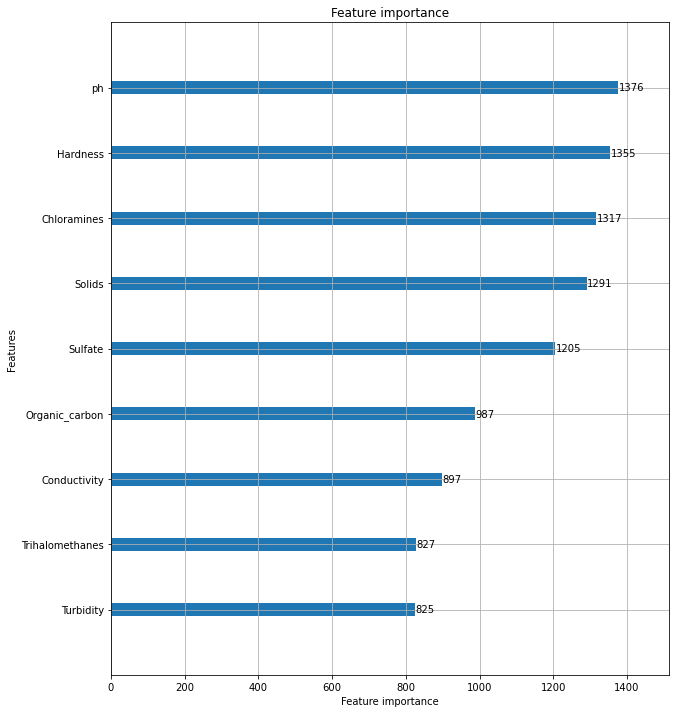

In [36]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(lgbm_wrapper, ax)




## **3-2. HyperOpt**

In [37]:
from hyperopt import hp

### **3-2-a. 주어진 정보를 바탕으로 검색 공간을 설정해 주세요.**
(힌트: `hp.uniform`)

- max_depth: 5에서 20까지, 간격 = 1
- min_child_weight: 1에서 2까지, 간격 = 1
- colsample_bytree: 0.5, 1
- learning_rate: 0.01에서 0.2 사이, 정규 분포된 값으로

In [51]:
search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
                'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
               }

### **3-2-b. 검색 공간을 인자로 받아 목적함수를 완성해 주세요.**
(n_estimators = 800)  
(❓❓❓❓❓로 표시된 빈칸을 채워주세요!)

In [52]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK


def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 800,
                            max_depth = int(search_space['max_depth']),    
                            min_child_weight = int(search_space['min_child_weight']),
                            learning_rate = search_space['learning_rate'],
                            colsample_bytree = search_space['colsample_bytree'],
                            eval_metric = 'logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring = 'accuracy', cv = 3)

    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}

### **3-2-c. best에 `fmin()` 함수를 이용하여 최적 파라미터 값들을 저장해 주세요.**
- fn, 검색공간: 위에서 구한 값
- 최대 반복 횟수: 50

In [53]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn = objective_func,
            space = search_space,
            algo = tpe.suggest,
            max_evals = 50,
            trials = trial_val,
            rstate = np.random.default_rng(seed = 9))
print('best:', best)

100%|███████████████████████████████████████████████| 50/50 [08:27<00:00, 10.14s/trial, best loss: -0.6625980884279028]
best: {'colsample_bytree': 0.7885873905384678, 'learning_rate': 0.011604457950492832, 'max_depth': 12.0, 'min_child_weight': 1.0}


### **3-2-d. 아래는 best에 포함된 최적 파라미터들을 할당한 분류기입니다. 해당 분류기의 정확도를 출력해 주세요.**

In [54]:
xgb_wrapper = XGBClassifier(n_estimators = 400,
                            learning_rate = round(best['learning_rate'], 5),
                            max_depth = int(best['max_depth']),
                            min_child_weight = int(best['min_child_weight']),
                            colsample_bytree = round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss',
                eval_set = evals, verbose = 0)

preds = xgb_wrapper.predict(X_val)
xgb_accuracy = accuracy_score(y_val, preds)

print('xgb_wrapper 정확도:{0:.4f}'.format(xgb_accuracy))


C:\Users\Flex\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Flex\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


xgb_wrapper 정확도:0.6860


# **4. 스태킹**
- 4번 문제는 3번 문제에서 전처리 된 `water_potability.csv` 데이터를 계속 활용하시면 됩니다.

## **4-a. 기본 스태킹 기법을 적용해 봅시다.**
- `SVM`, `KNN`, `로지스틱 회귀`, `결정 트리` 모델 객체를 생성해 주세요.
- 최종 메타 모델은 `랜덤 포레스트`를 활용해주세요.
- 파라미터 설정
  - SVM: random_state = 0
  - KNN: n_neighbors = 8
  - RandomForest: n_estimators = 100, random_state = 0
  - 나머지: 기본 파라미터(base model)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# SVM, KNN, 로지스틱 회귀, 결정 트리 개별 모델들을 생성해 주세요.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

svm_clf = SVC(random_state = 0)
knn_clf = KNeighborsClassifier(n_neighbors=8)
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()

# 최종 메타 모델로 랜덤 포레스트를 생성해 주세요.
rf_final = RandomForestClassifier(n_estimators = 100, random_state = 0)

## **4-b. 개별 모델들을 학습시키고 예측을 수행합니다.**
- 아래 코드를 완성시켜 봅시다.



In [10]:
svm_clf.fit(X_tr, y_tr)
knn_clf.fit(X_tr, y_tr)
lr_clf.fit(X_tr, y_tr)
dt_clf.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [12]:
## 학습된 개별 모델들이 반환하는 예측 데이터셋을 생성하세요.
# 예측 시 들어가는 테스트 데이터셋 이름은 X_val 입니다.
svm_pred = svm_clf.predict(X_val)
knn_pred = knn_clf.predict(X_val)
lr_pred = lr_clf.predict(X_val)
dt_pred = dt_clf.predict(X_val)

## 예측 정확도를 반환하세요. 테스트 레이블 데이터셋 이름은 y_val 입니다.
# hint : accuracy_score()

from sklearn.metrics import accuracy_score


svm_accuracy = accuracy_score(y_val, svm_pred)
knn_accuracy = accuracy_score(y_val, knn_pred)
lr_accuracy = accuracy_score(y_val,lr_pred)
dt_accuracy = accuracy_score(y_val,dt_pred)

print('SVM 정확도: {0:.4f}'.format(svm_accuracy))
print('KNN 정확도: {0:.4f}'.format(knn_accuracy))
print('로지스틱 회귀 정확도: {0:.4f}'.format(lr_accuracy))
print('결정 트리 정확도: {0:.4f}'.format(dt_accuracy))

SVM 정확도: 0.6220
KNN 정확도: 0.5793
로지스틱 회귀 정확도: 0.6220
결정 트리 정확도: 0.5701


## **4-c. 반환된 예측 데이터셋을 행 형태로 묶어 pred 데이터셋에 저장합니다**

In [14]:
pred = np.array([svm_pred, knn_pred, lr_pred, dt_pred])
print(pred.shape)

# 행과 열의 위치를 교환해 원본 데이터 값 하나 당 예측 데이터셋의 값이 1대1 매칭이 되도록 하세요.
pred = np.transpose(pred)
print(pred.shape)

(4, 328)
(328, 4)


## **4-d. 완성된 최종 데이터셋을 최종 메타 모델에 학습시키고 예측시킵니다.**
- 기본 스태킹 모델이므로 학습과 예측 모두 **동일한** 데이터셋을 사용합니다.
- **정확도**도 함께 출력해 주세요.

In [16]:
rf_final.fit(pred, y_val)
final = rf_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_val , final)))

최종 메타 모델의 예측 정확도: 0.6220


# **5. CatBoost**
- 책에서 다루지 않는 부분이기 때문에 간단한 실습만 진행합니다.

In [17]:
# catboost를 사용하기 위해 다음 코드를 실행합니다.

!pip install optuna
!pip install catboost

In [18]:
from sklearn import datasets
from sklearn import metrics
from catboost import CatBoostClassifier

In [19]:
df = datasets.load_iris()
X = df.data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
# CatBoostClassifier 객체를 생성하고 학습시켜 주세요.

model_CBC = CatBoostClassifier()
model_CBC.fit(X_train, y_train, verbose = 0)

In [21]:
# pred에 X_test에 대한 예측 결과를 저장해 주세요.
pred = model_CBC.predict(X_test)

# 아래 코드를 완성해서 정확도를 출력하세요.
print('CatBoost의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

CatBoost의 예측 정확도: 0.9333
